In [1]:
#Data Collection & Loading for CTR Prediction (Click-Through Rate Prediction) Project

#import pandas, numpy, matplotlib, seaborn and sklearn libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
#read a csv file and importing data
file_path = r"C:\Users\vidus\Projects\Springboard\CTRPredictionCapstone\data\raw\train.csv"
train_df = pd.read_csv(file_path)
train_df = pd.read_csv(file_path, nrows=100000)  # Load first 100k rows for testing

In [3]:
#getting first five rows
train_df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [4]:
# description of the data
train_df.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,1.000000e+05,100000.000000,100000.0,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,9.500813e+18,0.174900,14102100.0,1005.034410,0.19830,1.055730,0.199270,17682.145900,318.333960,56.818920,1964.034380,0.789350,131.734480,37874.227610,88.555670
std,5.669410e+18,0.379883,0.0,1.088741,0.40264,0.583993,0.635268,3237.735265,11.931939,36.924104,394.962696,1.223761,244.076787,48546.274316,45.482841
min,3.237563e+13,0.000000,14102100.0,1001.000000,0.00000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,13.000000
25%,4.183340e+18,0.000000,14102100.0,1005.000000,0.00000,1.000000,0.000000,15704.000000,320.000000,50.000000,1722.000000,0.000000,35.000000,-1.000000,61.000000
50%,1.074496e+19,0.000000,14102100.0,1005.000000,0.00000,1.000000,0.000000,17654.000000,320.000000,50.000000,1993.000000,0.000000,35.000000,-1.000000,79.000000
75%,1.457542e+19,0.000000,14102100.0,1005.000000,0.00000,1.000000,0.000000,20362.000000,320.000000,50.000000,2306.000000,2.000000,39.000000,100083.000000,156.000000
max,1.844670e+19,1.000000,14102100.0,1010.000000,5.00000,5.000000,5.000000,21705.000000,728.000000,480.000000,2497.000000,3.000000,1835.000000,100248.000000,157.000000


The above description shows that - 

Count: Total number of records (100,000 in this case).

Mean, Std, Min, 25%, 50%, 75%, Max: Statistical summary of numerical columns, e.g., mean click rate, device type, etc.

Columns like C1, C14, C15, etc.: - Represent categorical or feature columns with associated statistics.

In [6]:
#summary  of a dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                100000 non-null  float64
 1   click             100000 non-null  int64  
 2   hour              100000 non-null  int64  
 3   C1                100000 non-null  int64  
 4   banner_pos        100000 non-null  int64  
 5   site_id           100000 non-null  object 
 6   site_domain       100000 non-null  object 
 7   site_category     100000 non-null  object 
 8   app_id            100000 non-null  object 
 9   app_domain        100000 non-null  object 
 10  app_category      100000 non-null  object 
 11  device_id         100000 non-null  object 
 12  device_ip         100000 non-null  object 
 13  device_model      100000 non-null  object 
 14  device_type       100000 non-null  int64  
 15  device_conn_type  100000 non-null  int64  
 16  C14               100

The dataset contains 100,000 entries and 24 columns, with a mix of numerical and categorical data. 

The numerical columns (id, click, hour, C1, etc.) represent various features, while columns like site_id, site_domain, device_ip, etc., are categorical and contain object data types. 

The dataset seems to focus on click-through rate (CTR) prediction with features related to user behavior, device, and advertisement attributes. 

There are no missing values, but some columns may need encoding or transformation for machine learning models.

In [8]:
#get the last n rows
train_df.tail()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
99995,7.336716e+18,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,5e3f096f,2347f47a,...,1,0,21611,320,50,2480,3,297,100111,61
99996,7.337102e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,-1,79
99997,7.337105e+18,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,-1,79
99998,7.337331e+17,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,-1,79
99999,7.337345e+18,0,14102100,1002,0,cc1b7a47,7256c623,50e219e0,ecad2386,7801e8d9,...,0,0,21665,320,50,2493,3,35,-1,117


In [9]:
# Data Definition
# Check column names and data types
print(train_df.dtypes)
print(train_df.columns)

id                  float64
click                 int64
hour                  int64
C1                    int64
banner_pos            int64
site_id              object
site_domain          object
site_category        object
app_id               object
app_domain           object
app_category         object
device_id            object
device_ip            object
device_model         object
device_type           int64
device_conn_type      int64
C14                   int64
C15                   int64
C16                   int64
C17                   int64
C18                   int64
C19                   int64
C20                   int64
C21                   int64
dtype: object
Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')


The dataset consists of 24 columns, with both numerical and categorical data types. 

The numerical columns include int64 types (such as click, hour, device_type, etc.) and one float64 column (id). 

The categorical columns are of the object type, including site_id, site_domain, app_id, and others.

The columns seem to represent various aspects of click-through rate prediction, such as user behavior, device, and ad attributes.

In [11]:
#finding the categorial columns

categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

Index(['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain',
       'app_category', 'device_id', 'device_ip', 'device_model'],
      dtype='object')


The categorial columns are 'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model' and data types are 'object' for categorial columns. 

In [13]:
#Handling Missing Values

# Check for missing values
missing_values = train_df.isnull().sum()
print(missing_values[missing_values > 0]) # Show only columns with missing values

Series([], dtype: int64)


The dataset doesn't contain any missing values, as confirmed by the output of train_df.isnull().sum(), 

which shows no columns with missing data.

In [15]:
#Drop or fill missing values

train_df.fillna("-1", inplace=True) #Replace NaNs with "-1" (placeholder)

By using train_df.fillna("-1", inplace=True), replace any missing values (if they existed) in the dataset with the string "-1". 

However, since there were no missing values in the dataset (as shown previously), this line of code doesn't make any changes to the data.

                 id          click        hour             C1    banner_pos  \
count  1.000000e+05  100000.000000    100000.0  100000.000000  100000.00000   
mean   9.500813e+18       0.174900  14102100.0    1005.034410       0.19830   
std    5.669410e+18       0.379883         0.0       1.088741       0.40264   
min    3.237563e+13       0.000000  14102100.0    1001.000000       0.00000   
25%    4.183340e+18       0.000000  14102100.0    1005.000000       0.00000   
50%    1.074496e+19       0.000000  14102100.0    1005.000000       0.00000   
75%    1.457542e+19       0.000000  14102100.0    1005.000000       0.00000   
max    1.844670e+19       1.000000  14102100.0    1010.000000       5.00000   

         device_type  device_conn_type            C14            C15  \
count  100000.000000     100000.000000  100000.000000  100000.000000   
mean        1.055730          0.199270   17682.145900     318.333960   
std         0.583993          0.635268    3237.735265      11.931939   


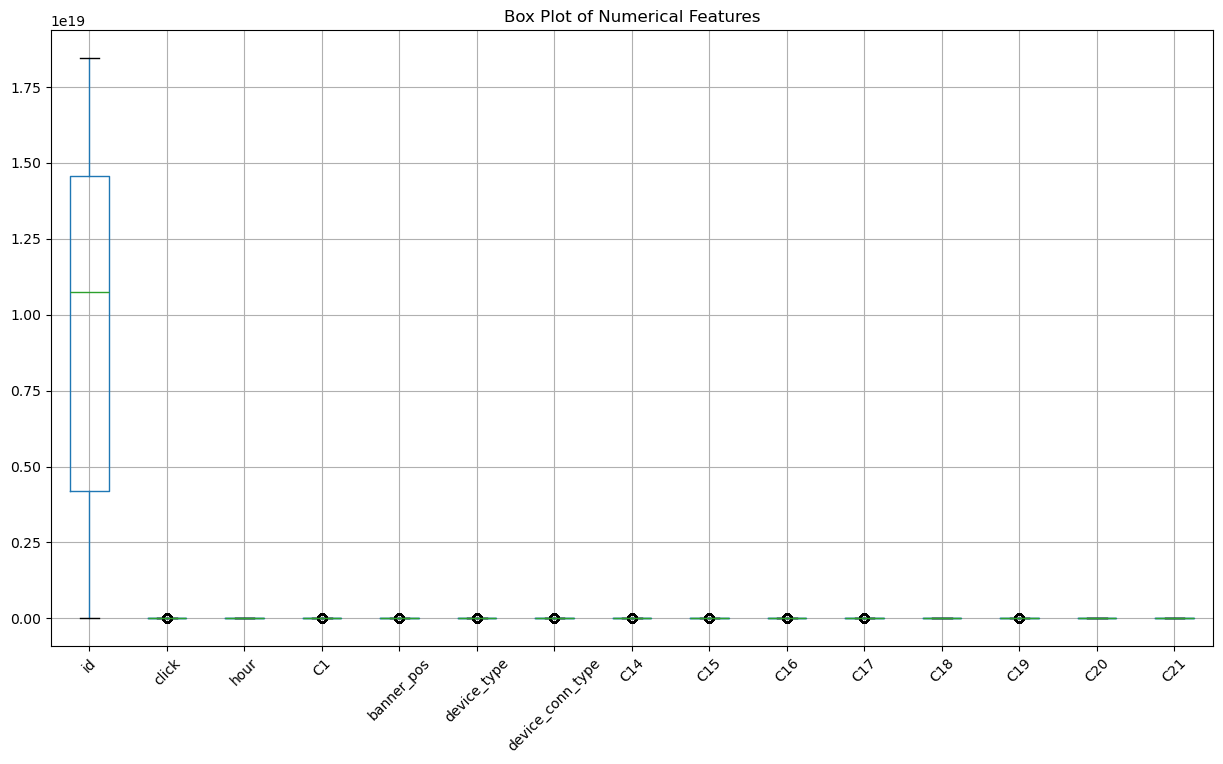

Outliers detected in each column:
 id                      0
click               17490
hour                    0
C1                   7546
banner_pos          19751
device_type          7403
device_conn_type     9292
C14                  3056
C15                  4867
C16                  4379
C17                  3090
C18                     0
C19                 22031
C20                     0
C21                     0
dtype: int64


In [17]:
#Handling Outliers
# Select numeric columns

# Select numerical columns only
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Check for outliers using summary statistics
print(train_df[num_cols].describe())

# Plot boxplots for numerical features to visualize outliers
plt.figure(figsize=(15, 8))
train_df[num_cols].boxplot(rot=45)
plt.title("Box Plot of Numerical Features")
plt.show()

# Detect outliers using the IQR method
Q1 = train_df[num_cols].quantile(0.25)
Q3 = train_df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((train_df[num_cols] < lower_bound) | (train_df[num_cols] > upper_bound)).sum()
print("Outliers detected in each column:\n", outliers)


Based on the outlier analysis, several columns in the dataset contain a significant number of outliers. 


1. Outlier Detection Results
Columns with Outliers:

click: 17,490 outliers

C1: 7,546 outliers

banner_pos: 19,751 outliers

device_type: 7,403 outliers

device_conn_type: 9,292 outliers

C14: 3,056 outliers

C15: 4,867 outliers

C16: 4,379 outliers

C17: 3,090 outliers

C19: 22,031 outliers

Columns without Outliers:

id, hour, C18, C20, C21
Notable Observations:

banner_pos and C19 have a high number of outliers, suggesting that these features contain values that deviate significantly from the majority.

click, the target variable, has outliers, but since it's binary (0/1), they may represent class imbalance rather than true anomalies.

device_type and device_conn_type have outliers, likely representing rare device configurations.


In [19]:

# Option 1: Remove rows with extreme outliers
train_df_cleaned = train_df[~((train_df[num_cols] < lower_bound) | (train_df[num_cols] > upper_bound)).any(axis=1)]

# Option 2: Cap outliers at the threshold (Winsorization)
train_df_capped = train_df.copy()
train_df_capped[num_cols] = np.where(train_df[num_cols] < lower_bound, lower_bound, train_df[num_cols])
train_df_capped[num_cols] = np.where(train_df[num_cols] > upper_bound, upper_bound, train_df[num_cols])


# Define the directory for saving cleaned data
clean_data = r"..\data\clean_data"
os.makedirs(clean_data, exist_ok=True)

# Save cleaned data
train_df_cleaned.to_csv(os.path.join(clean_data, "cleaned_no_outliers.csv"), index=False)
train_df_capped.to_csv(os.path.join(clean_data, "capped_outliers.csv"), index=False)

# Save cleaned data
#train_df_cleaned.to_csv(os.path.join(clean_data_folder, "cleaned_no_outliers.csv"), index=False)
#train_df_cleaned.to_csv(os.path.join(clean_data_folder, "capped_outliers.csv"), index=False)

#train_df_cleaned.to_csv("cleaned_no_outliers.csv", index=False)
#train_df_capped.to_csv("capped_outliers.csv", index=False)

print("Outlier handling complete! Files saved as 'cleaned_no_outliers.csv' and 'capped_outliers.csv'.")


Outlier handling complete! Files saved as 'cleaned_no_outliers.csv' and 'capped_outliers.csv'.


2. Handling Outliers:
   
Two approaches were applied:

Option 1: Removing Extreme Outliers:

Rows containing extreme outliers were removed, resulting in a cleaned dataset (cleaned_no_outliers.csv).

Option 2: Capping Outliers (Winsorization):

Outliers were replaced with upper and lower bounds defined by the IQR method, leading to a capped dataset (capped_outliers.csv).

In [21]:
#Convert Date/Time Features
# Convert 'hour' column to datetime
train_df['hour'] = pd.to_datetime(train_df['hour'], format="%y%m%d%H")

# Extract useful time features
train_df['day'] = train_df['hour'].dt.day
train_df['hour_of_day'] = train_df['hour'].dt.hour
train_df['weekday'] = train_df['hour'].dt.weekday

In the above code, I converted the hour column to a datetime object using pd.to_datetime(), which enables to extract additional time-based features such as:

Day: Extracted using .dt.day
Hour of the day: Extracted using .dt.hour
Weekday: Extracted using .dt.weekday (where Monday = 0, Sunday = 6)

These new features can help in further analysis, especially when analyzing patterns related to time in your CTR prediction model.

In [23]:
#checking if hour column is converted to datetime 
train_df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C15,C16,C17,C18,C19,C20,C21,day,hour_of_day,weekday
0,1.000009e+18,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,-1,79,21,0,1
1,1.000017e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,100084,79,21,0,1
2,1.000037e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,100084,79,21,0,1
3,1.000064e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,100084,79,21,0,1
4,1.000068e+19,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,320,50,2161,0,35,-1,157,21,0,1


It looks like the hour column has successfully been converted to datetime format. 

Now we have additional features such as day, hour_of_day, and weekday extracted from the hour column, which can be useful for analyzing time-related patterns in the data. 

These features can be useful in CTR prediction model to enhance insights and model accuracy.

In [25]:
# Drop the original 'hour' column
train_df.drop(columns=['hour'], inplace=True)

# Display the modified DataFrame
print(train_df.head())

             id  click    C1  banner_pos   site_id site_domain site_category  \
0  1.000009e+18      0  1005           0  1fbe01fe    f3845767      28905ebd   
1  1.000017e+19      0  1005           0  1fbe01fe    f3845767      28905ebd   
2  1.000037e+19      0  1005           0  1fbe01fe    f3845767      28905ebd   
3  1.000064e+19      0  1005           0  1fbe01fe    f3845767      28905ebd   
4  1.000068e+19      0  1005           1  fe8cc448    9166c161      0569f928   

     app_id app_domain app_category  ...  C15 C16   C17  C18  C19     C20  \
0  ecad2386   7801e8d9     07d7df22  ...  320  50  1722    0   35      -1   
1  ecad2386   7801e8d9     07d7df22  ...  320  50  1722    0   35  100084   
2  ecad2386   7801e8d9     07d7df22  ...  320  50  1722    0   35  100084   
3  ecad2386   7801e8d9     07d7df22  ...  320  50  1722    0   35  100084   
4  ecad2386   7801e8d9     07d7df22  ...  320  50  2161    0   35      -1   

   C21  day  hour_of_day  weekday  
0   79   21         

In [26]:
# Drop 'id' since it doesn’t help in CTR prediction
train_df.drop(columns=['id'], inplace=True)  

# Display the modified DataFrame
print(train_df.head())

   click    C1  banner_pos   site_id site_domain site_category    app_id  \
0      0  1005           0  1fbe01fe    f3845767      28905ebd  ecad2386   
1      0  1005           0  1fbe01fe    f3845767      28905ebd  ecad2386   
2      0  1005           0  1fbe01fe    f3845767      28905ebd  ecad2386   
3      0  1005           0  1fbe01fe    f3845767      28905ebd  ecad2386   
4      0  1005           1  fe8cc448    9166c161      0569f928  ecad2386   

  app_domain app_category device_id  ...  C15 C16   C17  C18  C19     C20  \
0   7801e8d9     07d7df22  a99f214a  ...  320  50  1722    0   35      -1   
1   7801e8d9     07d7df22  a99f214a  ...  320  50  1722    0   35  100084   
2   7801e8d9     07d7df22  a99f214a  ...  320  50  1722    0   35  100084   
3   7801e8d9     07d7df22  a99f214a  ...  320  50  1722    0   35  100084   
4   7801e8d9     07d7df22  a99f214a  ...  320  50  2161    0   35      -1   

   C21  day  hour_of_day  weekday  
0   79   21            0        1  
1   79  

The hour column and the id column has been successfully dropped as it doesn't contribute to the CTR prediction model, and the DataFrame is now ready for further analysis. 

The modified DataFrame now includes 26 columns, with the day, hour_of_day, and weekday features still present for use in the model.

In [28]:
# Remove duplicates if any 
train_df.drop_duplicates(inplace=True)

The drop_duplicates() method has been applied to remove any duplicate rows from the train_df DataFrame. 

This ensures that each record is unique, and the dataset is clean for further analysis or modeling. 

In [30]:
# Example of cleaning: Encoding categorical columns
#train_df['hour'] = train_df['hour'].astype('category').cat.codes
print(train_df.columns)

Index(['click', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21', 'day', 'hour_of_day', 'weekday'],
      dtype='object')


In [31]:
# List of categorical columns
categorical_columns = ['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain',
       'app_category', 'device_id', 'device_ip', 'device_model']
# Label Encoding for categorical features
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    train_df[col] = label_encoders[col].fit_transform(train_df[col])
# Now, your categorical features are numerically encoded and ready for use in model training

In [32]:
# To optiomize the usage, Convert categorical columns to category dtype
#converting categorial feature to numerical format
#idenfying categorial columns
categorical_cols = [col for col in train_df.columns if train_df[col].dtype == 'object' and col not in ['id', 'click']]
for col in categorical_cols:
    train_df[col] = train_df[col].astype('category')  # Convert to categorical dtype
    train_df[col] = train_df[col].cat.codes  # Convert to numerical encoding

In [33]:
# Optimize memory usage
def reduce_memory(train_df):
    for col in train_df.columns:
        if train_df[col].dtype == 'int64':
            train_df[col] = train_df[col].astype('int32')
        elif train_df[col].dtype == 'float64':
            train_df[col] = train_df[col].astype('float32')
    return train_df

train_df = reduce_memory(train_df)

In [34]:
# Display final clean dataset
print(train_df.info())
print(train_df.head())  # Check cleaned data

<class 'pandas.core.frame.DataFrame'>
Index: 75058 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   click             75058 non-null  int32
 1   C1                75058 non-null  int32
 2   banner_pos        75058 non-null  int32
 3   site_id           75058 non-null  int32
 4   site_domain       75058 non-null  int32
 5   site_category     75058 non-null  int32
 6   app_id            75058 non-null  int32
 7   app_domain        75058 non-null  int32
 8   app_category      75058 non-null  int32
 9   device_id         75058 non-null  int32
 10  device_ip         75058 non-null  int32
 11  device_model      75058 non-null  int32
 12  device_type       75058 non-null  int32
 13  device_conn_type  75058 non-null  int32
 14  C14               75058 non-null  int32
 15  C15               75058 non-null  int32
 16  C16               75058 non-null  int32
 17  C17               75058 non-null  in

The first few rows show that the features have been encoded numerically, and all categorical features have been converted into integer values. The target column (click) seems to be binary (0 or 1), indicating whether an event (click) occurred.

The columns appear to represent various features related to ad impressions, such as:

C1: Could be an encoded categorical feature related to a campaign or other categorical group.

banner_pos: Likely represents the position of the ad banner.

site_id, app_id: Identifiers for the site and app.

device_info (e.g., device_id, device_ip): Information about the user's device.

C14, C15, C16, etc.: Could represent other encoded or engineered features.

In [36]:
# Define the directory for saving cleaned data
clean_data = r"..\data\clean_data"
os.makedirs(clean_data, exist_ok=True)

# Save cleaned data
train_df.to_csv(os.path.join(clean_data, "cleaned_ctr_prediction_data.csv"), index=False)

# Save the cleaned data to a CSV file
#train_df.to_csv("cleaned_ctr_prediction_data.csv", index=False)

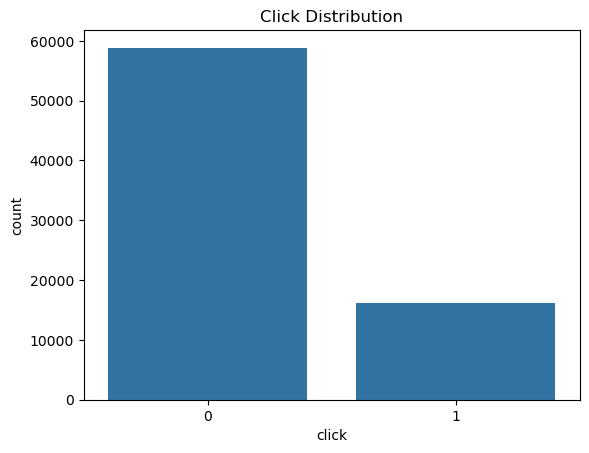

In [37]:
# Visualize target distribution
sns.countplot(x=train_df['click'])
plt.title("Click Distribution")
plt.show()

X-axis: "click" with values 0 and 1.

Y-axis: "count" representing the number of occurrences of each value.

The plot shows that there are significantly more entries with click = 0 than click = 1. 

This indicates an imbalanced dataset, where the majority of instances did not result in a click.

In [39]:
# Save the cleaned data to a CSV file
#train_df.to_csv("cleaned_ctr_prediction_data.csv", index=False)
# Save cleaned data
train_df.to_csv(os.path.join(clean_data, "cleaned_ctr_prediction_data.csv"), index=False)

print("Data cleaning and wrangling complete. File saved as 'cleaned_ctr_prediction_data.csv'.")

Data cleaning and wrangling complete. File saved as 'cleaned_ctr_prediction_data.csv'.
